In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Data\salary.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#data[['workclass','salary']].groupby(['workclass']).mean()

In [5]:
data.isna().sum()  #no null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [6]:
data.drop(['capital-loss'],axis=1,inplace=True) #bec const value

In [7]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,United-States,<=50K


<AxesSubplot:>

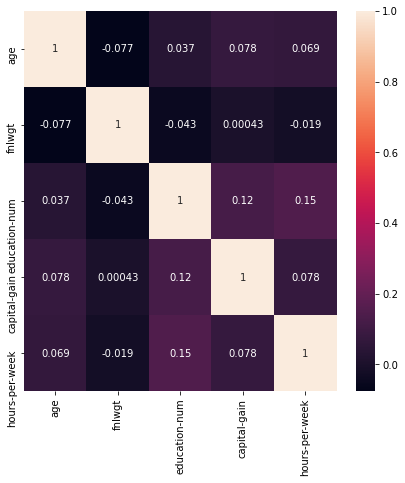

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)

## transforming object values to numeric

In [9]:
from sklearn.preprocessing import LabelEncoder  #using LE to give distict int values to cols of type object

In [10]:
for col in data.columns:
    if data[col].dtype=='object':
        le=LabelEncoder()
        data.loc[:,[col]]=le.fit_transform(data.loc[:,[col]].values)
    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  native-country  32561 non-null  int32
 13  salary          32561 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.4 MB


In [12]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,40,39,1


<AxesSubplot:>

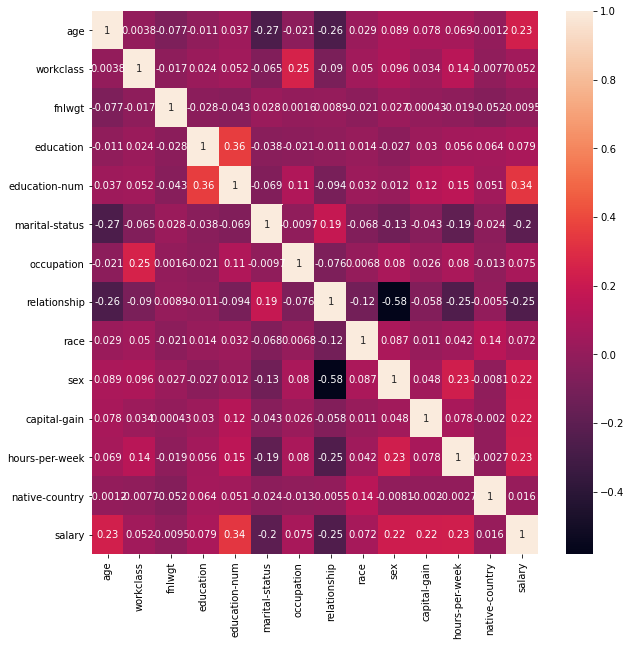

In [13]:
plt.figure(figsize=(10,10))  #finding highest corr feature with target
sns.heatmap(data.corr(),annot=True)

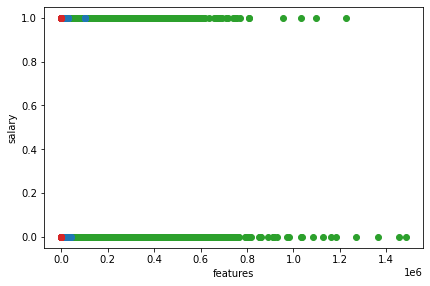

In [14]:
for col in data.columns:
    plt.scatter(data[col],data['salary'])
    plt.tight_layout(pad=0.8)
    plt.xlabel('features')
    plt.ylabel('salary')
plt.show()

In [ ]:
sns.pairplot(data)

## Linear Regression Model

In [19]:
x=data.iloc[:,:-1].values  #all features except target
y=data.iloc[:,-1].values  #target only

In [20]:
from sklearn.model_selection import train_test_split 
train_x,train_y,test_x,test_y=train_test_split(x,y,test_size=0.1)

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()  #creating instance
model.fit(train_x,train_y)  #training model

ValueError: Found input variables with inconsistent numbers of samples: [29304, 3257]